<h1 align="center"> IST 5520 Milestone 2: Data Analysis I <h1>
<h3 align="center"> AirBnB Dataset <h3>

#### Student: Ronald Adomako
#### Student: Idris Dobbs
#### Student: Narendra Chigili
#### Student: Nikhil Srirama Sai

# Instruction 1: Cleanse and visualize data

## Introduction

AirBnB is a PaaS for the short term rental market. Users use the platform to list residences for short term rentals. We noticed that for big cities, such as New York City, there are many host and some may want to use AirBnB for lucrative means. Given location and characteristics of a property, a new host would want to know whether he or she is charging the optimal amount to rent the space to lodgers.

We noticed that from the New York City dataset for AirBnB, the categorical variable for location  was too coarse. The descriptor says the location is categorized into five boroughs. For a big city such as New York City, there are a lot of insights missing from a business perspective because neighborhoods vary drastically in property amenities even within a single borough. Moreso, the geo-coordinates are too fine for business purposes. To handle this we implement a zip code converter to categorize properties based on their location - Feature Selection.

- What are the largest determinants / predictors of AirBnB rental prices?
- How can we optimize rental revenue based on rental location and other characteristics?
- What price should be charged based on rental location/ characteristics?

We are opperating under the assumption that NYC AirBnB prices has reached a *steady-state*: i.e. the market has been active for long enough in NYC and there are enough data points (observations) in NYC that the **mean** is meaningful.

We want to know whether a host is charging an optimal price. To do this we group the observations by neigborhood and then take the average price. Hosts who charge at or above this price are considered optimal in their respective neighborhood while hosts who charge below the average price for their neighborhood are sub-optimal. Consider the case where all hosts charge the same price within a neighborhood, then the mean is the mode is the median- uniform data, no variance. All the hosts in this neighborhood would be optimal.

Consider the case where one of those hosts charge below what would have been the average, then only that host is sub-optimal while the rest are optimal. Conversely, if one host charge above the rest while everyone else charges the same, then that one host would be optimal while the rest are suboptimal.

Along with the *steady-state* assumption, by grouping the data by neighborhoods we assume that on average homes and amenities are similar by neighborhood. The geo-coordinates are too fine a scale and the boroughs are too coarse a scale. A meso-scale would be by zipcode, which we would expect to have higher precision of similarities between host, or by neighborhood. For a dataset with 39881 observations, transforming geo-coordinates prove to be computationally expensive (22 hours on standard household computer). We chose the next best meso-scale: what AirBnB features as "neighbourhood".

From a business perspective, we want to know what percent of hosts per neighborhood are charging an optimal price, and aggregating this data the percent hosts charge an optimal price in NYC overall. We see that using the neighborhood grouping allows us to compare on a common scale for all hosts. We don't have hosts income, so we wouldn't be able to measure profit. Likewise, revenue wouldn't be a fair scale because hosts with more units will outperform host with smaller units just by volume. A nieghborhood comparison allows a better metric to assess price per room, where we expect reasonably small variance per neighborhood. Furthermore, comparing by percentage is normalizes our comparison in general.

## Data Source and Collection

#### We chose the AirBnB dataset for New York City (NYC). We want to build a model that indicates whether hosts are charging an optimum amount for their rental.

http://insideairbnb.com/new-york-city/

[data dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)

http://insideairbnb.com/get-the-data

http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/visualisations/listings.csv



The data dictionary for New York City AirBnB dataset consists of 75 columns (variables or features) and 39881 observations. Based on our research question and several [Kaggle challenges](https://www.kaggle.com/search?q=airbnb-listing-in-nyc) (www.kaggle.com/search?q=airbnb-listing-in-nyc) we chose the following features for preliminary analysis.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

%matplotlib inline

In [8]:

csv_URL = "http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/visualisations/listings.csv"
df2 = pd.read_csv(csv_URL)

In [3]:
pd.DataFrame(df2.columns, columns=['Features'])

,Features
0,id
1,name
2,host_id
3,host_name
4,neighbourhood_group
5,neighbourhood
6,latitude
7,longitude
8,room_type
9,price


The full data dictionary has the following descriptions:

In [8]:
data = pd.read_csv('data_dictionary.csv')
pd.set_option('display.max_rows',1000)
data

FileNotFoundError: [Errno 2] No such file or directory: 'data_dictionary.csv'

In [7]:
df2

NameError: name 'df2' is not defined

## Data Manipulation

In [33]:
#df2.groupby?

In [10]:
#Create a data frame grouping by neighborhood for average price
hood_price_obj = df2[['neighbourhood','price']].groupby('neighbourhood')
df_mean_price = hood_price_obj.mean()
df_mean_price[['price']] = df_mean_price[['price']].round(2)
df_mean_price

,price
neighbourhood,
Allerton,118.78
Arden Heights,113.86
Arrochar,132.06
Arverne,230.26
Astoria,109.01
...,...
Windsor Terrace,175.40
Woodhaven,94.53
Woodlawn,141.00


In [11]:
df_mean_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, Allerton to Woodside
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   244 non-null    float64
dtypes: float64(1)
memory usage: 3.8+ KB


**We have reduced 39881 into 244 rows of manageable data!**

In [39]:
reducted_df = df2.stb.freq(['neighbourhood'])
reducted_df

,neighbourhood,count,percent,cumulative_count,cumulative_percent
0,Bedford-Stuyvesant,2779,6.968230,2779,6.968230
1,Williamsburg,2456,6.158321,5235,13.126551
2,Harlem,1878,4.709009,7113,17.835561
3,Midtown,1701,4.265189,8814,22.100750
4,Bushwick,1657,4.154861,10471,26.255610
...,...,...,...,...,...
239,Fort Wadsworth,1,0.002507,39877,99.989970
240,Ferry Point Park,1,0.002507,39878,99.992478
241,Country Club,1,0.002507,39879,99.994985
242,Bull's Head,1,0.002507,39880,99.997493


In [13]:
#df2.stb.freq(['neighbourhood']).describe()

In [41]:

#df = df2.sort_values('neighbourhood')
df_hood = df2.stb.freq(['neighbourhood'])
df_hood = df_hood.loc[:,'neighbourhood':'percent']
df_hood = df_hood.sort_values('neighbourhood')


In [42]:
df_hood.reset_index(inplace=True)


In [16]:
df_mean = df_mean_price[['price']].reset_index()
df_mean.head()

,neighbourhood,price
0,Allerton,118.78
1,Arden Heights,113.86
2,Arrochar,132.06
3,Arverne,230.26
4,Astoria,109.01


In [17]:
df_hood['price'] = df_mean['price']
df_hood.rename(columns={'index':'pop_rank'}, inplace=True)
df_hood.head()

,pop_rank,neighbourhood,count,percent,price
0,107,Allerton,45,0.112836,118.78
1,204,Arden Heights,7,0.017552,113.86
2,158,Arrochar,17,0.042627,132.06
3,64,Arverne,110,0.275821,230.26
4,14,Astoria,686,1.720117,109.01


In [20]:
df_hood['opt_percent'] = df_hood['percent']
df_hood.head()

,pop_rank,neighbourhood,count,percent,price,opt_percent
0,107,Allerton,45,0.112836,118.78,0.112836
1,204,Arden Heights,7,0.017552,113.86,0.017552
2,158,Arrochar,17,0.042627,132.06,0.042627
3,64,Arverne,110,0.275821,230.26,0.275821
4,14,Astoria,686,1.720117,109.01,1.720117


## Data Summarization and Visualization

In [9]:
df2_s1 = df2.groupby('neighbourhood').get_group('Bedford-Stuyvesant')
df2_s2 = df2.groupby('neighbourhood').get_group('Williamsburg')
df2_s3 = df2.groupby('neighbourhood').get_group('Harlem')





In [10]:
df_top3= pd.concat([df2_s1,df2_s2,df2_s3])

Text(0, 0.5, 'Price')

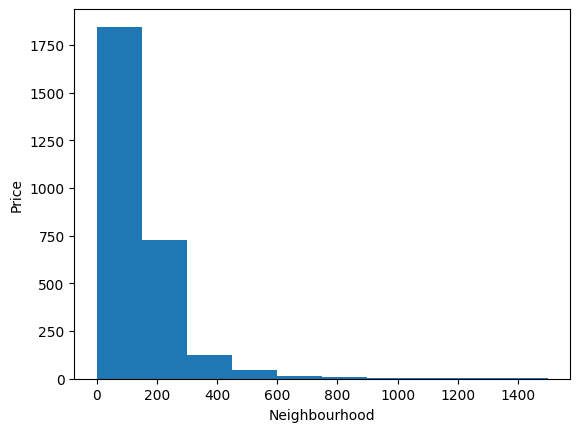

In [15]:
plt.hist(df2_s1.price)
plt.xlabel("Neighbourhood")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

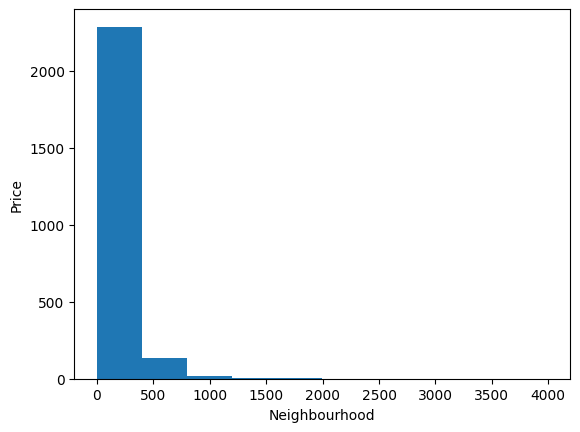

In [12]:
plt.hist(df2_s2.price)
plt.xlabel('Neighbourhood')
plt.ylabel("Price")

Text(0, 0.5, 'Price')

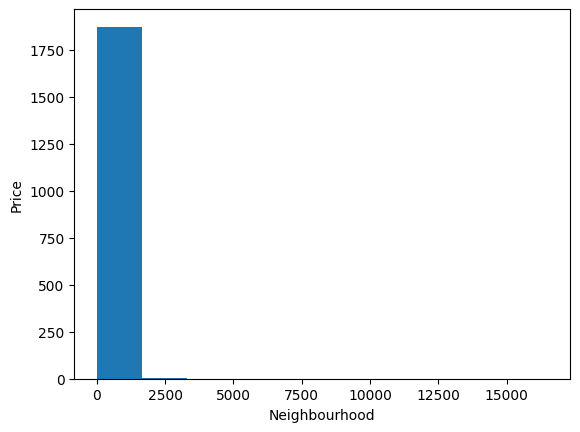

In [13]:
plt.hist(df2_s3.price)
plt.xlabel('Neighbourhood')
plt.ylabel("Price")

# Instruction 2: Jupyter Notebook

In [5]:
!which python

/opt/anaconda3/envs/MyEnv/bin/python


In [6]:
!which jupyter

/opt/anaconda3/envs/MyEnv/bin/jupyter


In [7]:
!which python3

/opt/anaconda3/envs/MyEnv/bin/python3


# Instruction 3: Github Repository, Handles, and Evaluation

https://github.com/Naren1610/IST5520GrpProj/

### IST5520GrpProj

<h4 align="left"> Ronald Adomako, adomakor412 </h3>
<h4 align="left"> Idris Dobbs, idobbs-2012 </h3>
<h4 align="left"> Narendra Chigili, Naren1610 </h3>
<h4 align="left"> Nikhil Srirama Sai, SaiNikhilPalaparthi </h3>